## 3- ODE solving (`dynamics.py` module).

This chapter shows how to use 4 of the most common S-timator functions:

- `read_model()`, reads a _string_ that conforms to a model description language, returning a `Model` object
- `solve()`, computes a solution of the ODE system associated with a model.
- `scan()`, calls Model.solve() several times, scanning a model parameter in a range of values.
- `plot()`, draws a graph of the results returned from `solve()` or `scan()`.


In [1]:
%matplotlib inline

from stimator import read_model, examples, __version__
print "S-timator version", __version__.fullversion, "(%s)" %__version__.date

S-timator version 0.9.95 (Jan 2015)


### Example 1
Glyoxalase system **model**


title Glyoxalase system
glo1 = HTA -> SDLTSH  , rate = V1*HTA/(Km1 + HTA)
glo2 = SDLTSH -> DLac , rate = V2*SDLTSH/(Km2 + SDLTSH)
V1  = 2.57594e-05
Km1 = 0.252531
V2  = 2.23416e-05
Km2 = 0.0980973
init :(SDLTSH = 7.69231E-05, HTA = 0.1357)
tf: 4030

==== Last time point ====
At t = 4030.0
SDLTSH  = 0.022744
DLac    = 0.010462
HTA     = 0.102571


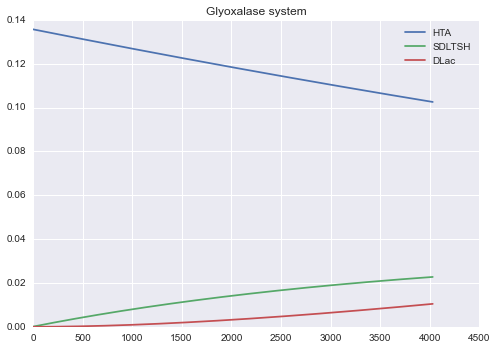

In [2]:
mdl = examples.models.glyoxalases.text
print mdl
m1 = read_model(mdl)

s = m1.solve(tf=4030.0)
s.plot()

print '==== Last time point ===='
print 'At t =', s.t[-1]
for x in s.last:
    print "%-8s= %f" % (x, s.last[x])

### Example 2
Branched pathway

title Branched pathway

v1 = A -> B, k1*A,      k1 = 10
v2 = B -> C, k2*B**0.5, k2 = 5
v3 = C -> D, k3*C**0.5, k3 = 2
v4 = C -> E, k4*C**0.5, k4 = 8
v5 = D ->  , k5*D**0.5, k5 = 1.25
v6 = E ->  , k6*E**0.5, k6 = 5
A  = 0.5
init : (B = 2, C = 0.25, D = 0.64, E = 0.64)
!! B D
tf: 10



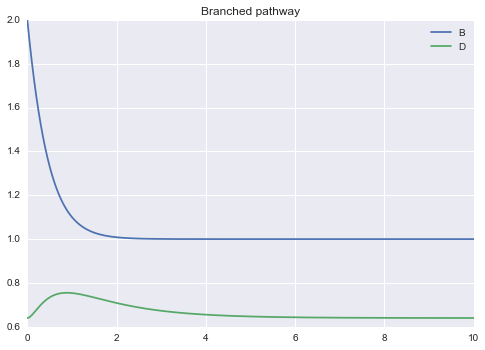

In [3]:
from numpy import append, linspace
mdl = examples.models.branched.text; print mdl
m2 = read_model(mdl)

times = append(linspace(0.0, 5.0, 500), linspace(5.0, 10.0, 500))

m2.solve(tf=10.0, times=times).plot()

### Example 3
Calcium spikes: CICR model

title CICR model. Calcium spikes
v0         = -> Ca, 1
v1         = -> Ca, k1*B*step(t, t_stimulus)

k1         = 7.3
B          = 0.4
t_stimulus = 1.0
    
export     = Ca ->  , 10 ..
leak       = CaComp -> Ca, 1 ..
    
v2         = Ca -> CaComp, 65 * Ca**2 / (1+Ca**2)
v3         = CaComp -> Ca, 500*CaComp**2/(CaComp**2+4) * Ca**4/(Ca**4 + 0.6561)
init       : Ca = 0.1, CaComp = 0.63655



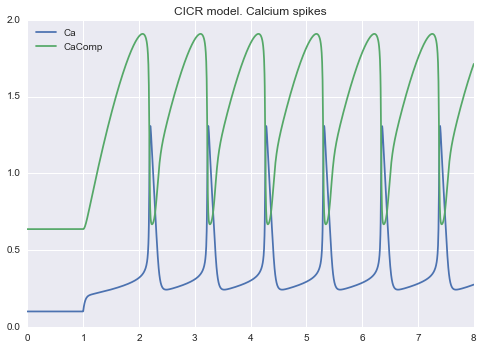

In [4]:
mdl = examples.models.ca.text; print mdl
#chaining functions...
read_model(mdl).solve(tf=8.0, npoints=2000).plot()

### Example 4
Rossler chaotic system

title Rossler

X1' = X2 - X3
X2' = 0.36 * X2 - X1
X3' = X1 *X3 - 22.5 * X3 - 49.6 * X1 + 1117.8

init : (X1 = 19.0, X2 = 47, X3 = 50)
tf:200
~ x3 = X3 -50.0
~ x1 = X1 -18.0
~ x2 = X2 -50.0



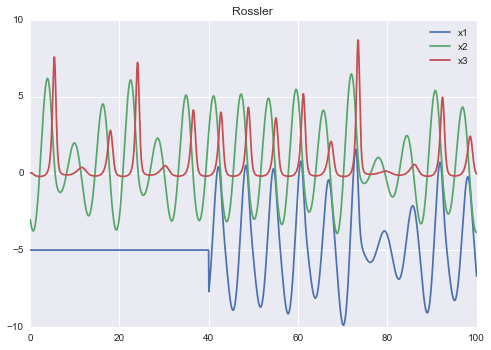

In [6]:
mdl = examples.models.rossler.text; print mdl
m4 = read_model(mdl)

s = m4.solve(tf=100.0, npoints=2000, outputs="x1 x2 x3".split())

def transformation(vars, t):
    if t > 40.0:
        return (vars[0] - 5.0, vars[1], vars[2])
    else:
        return (-5.0, vars[1], vars[2])

s.apply_transf(transformation)

s.plot()

### Example 5
Lorentz chaotic system: sensitivity to initial conditions

title Lorentz model: sensitivity to initial conditions
x' = 10*(y-x)
y' = x*(28-z)-y
z' = x*y - (8/3)*z
init: x = 1, y = 1, z = 1



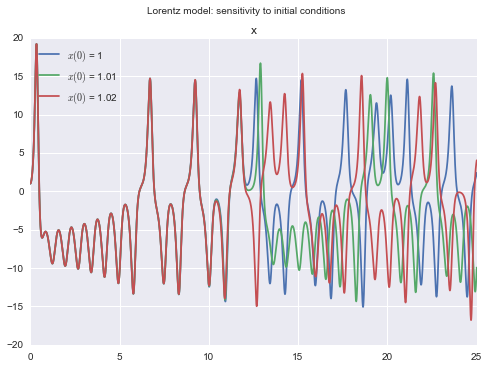

In [8]:
mdl = examples.models.lorentz.text
print mdl
m5 = read_model(mdl)

ivs = {'init.x':(1.0, 1.01, 1.02)}
titles = ['$x(0)$ = %g' % v for v in ivs['init.x']]
s = m5.scan(ivs, tf=25.0, npoints=20000, outputs=['x'], titles=titles)
s.plot(group='x', suptitlegend=m5.metadata['title'])

### Example 6
CICR model again: parameter scanning

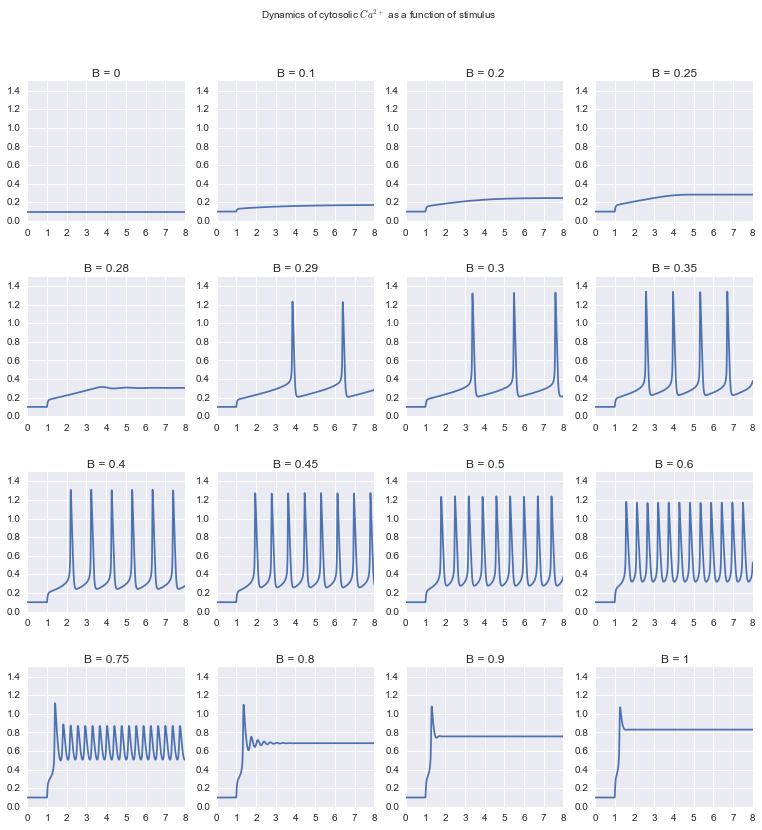

In [10]:
m = read_model("""
title Calcium Spikes
v0         = -> Ca, 1
v1         = -> Ca, k1*B*step(t, 1.0)
k1         = 7.3
B          = 0.4
export     = Ca ->  , 10 ..
leak       = CaComp -> Ca, 1 ..
!! Ca
v2         = Ca -> CaComp, 65 * Ca**2 / (1+Ca**2)
v3         = CaComp -> Ca, 500*CaComp**2/(CaComp**2+4) * Ca**4/(Ca**4 + 0.6561)
init       : (Ca = 0.1, CaComp = 0.63655)""")

import matplotlib as mpl
mpl.rcParams['figure.subplot.hspace']=0.4   #.2

Bstim = (0.0, 0.1, 0.2, 0.25, 0.28, 0.29, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.75, 0.8, 0.9, 1.0)
titles = ['$\\beta$ = %g' % B for B in Bstim]

s = m.scan({'B': Bstim}, tf=8.0, npoints=1000)
suptitlegend="Dynamics of cytosolic $Ca^{2+}$ as a function of stimulus"
s.plot(yrange=(0,1.5), legend=False, fig_size=(13.0,13.0), suptitlegend=suptitlegend)